# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 10, is characterized by a different temperature or a limited set of temperatures (if you need more than 10 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

---

### Travelling salesman su circonferenza unitaria

Prima di tutto si considera il problema del Travelling salesman su circonferenza unitaria con l'utilizzo della computazione parallela. In particolare vengono utilizzati due processi che implementano parallelamente l'algoritmo genetico utilizzato per risolvere il problema, come è stato fatto nell'esercizio precedente.

I due processi eseguono in parallelo l'algoritmo genetico come segue:

1. Il generatore di numeri casuali viene inizializzato in modo differente per i due processi, in modo che essi non estraggano gli stessi numeri casuali;

2. Il processo 0 costruisce in modo casuale il vettore contenente le 34 città estratte casualmente sulla circonferenza unitaria, e lo manda al processo 1, in modo tale che i processi risolvano lo stesso problema;

3. Viene eseguito l'algoritmo genetico da entrambi i processi, e dopo ogni 5 iterazioni il processo 1 invia al processo 0 il cromosoma migliore, con annessa loss function, per cui se il valore di tale loss function è minore della loss function del cromosoma migliore del processo 0, allora il cromosoma del processo 1 prende il posto di quello del processo 0 nella popolazione;

4. Il processo 0 c alcola dopo ogni iterazione la loss function minima e media, e alla fine dell'esecuzione dell'algoritmo genetico, salva i valori del cromosoma migliore.

Tale programma sfrutta l'utilizzo dei due metodi della libreria MPI `MPI_Send` e `MPI_Recv`. In teoria si dovrebbe osservare una convergenza alla soluzione più veloce rispetto a quella osservata nell'esercizio precedente.

Di seguito si mostra la soluzione del problema, che ovviamente dovrebbe coincidere con quella dell'esercizio precedente.

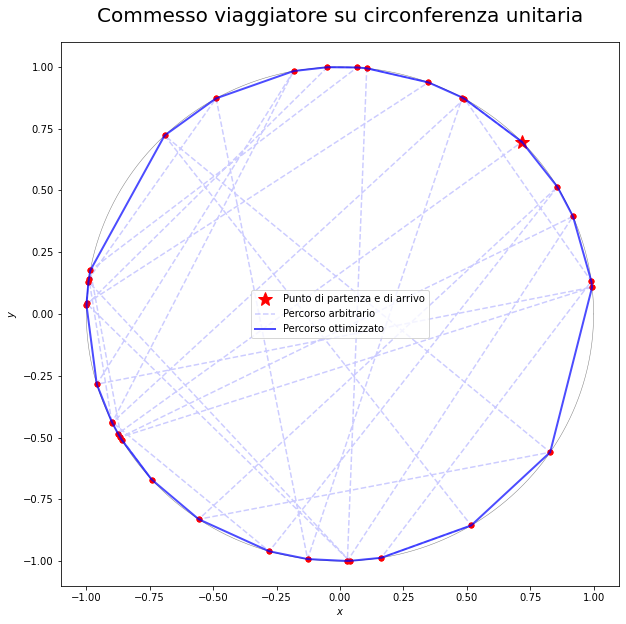

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

position0 = np.loadtxt('Circle_MPI/result_circumference.dat')
position00 = np.loadtxt('Circle_MPI/points_circumference.dat')

# Estraggo dei punti sulla circonferenza unitaria da plottare in grigio
M=5000                         
np.random.seed(0)     
r = 2*np.pi*np.random.rand(M) 
r.sort()
x_cirle = np.cos(r)
y_cirle = np.sin(r)

# Plotto la circonferenza unitaria
plt.figure(figsize=(10,10))
plt.title("Commesso viaggiatore su circonferenza unitaria", fontsize=20, pad=20)
plt.plot(x_cirle,y_cirle, linestyle ='-', color ='black',alpha=0.5,linewidth=0.5)

# Estraggo i vettori delle x e delle y del percorso arbitrario iniziale
x0 = position00[:, 0]
y0 = position00[:, 1]
x0 = np.append(x0,x0[0])
y0 = np.append(y0,y0[0])

# Plotto i punti estratti sulla circonferenza come punti rossi
for i in range(len(position00)):
    plt.plot(x0[i], y0[i], color='red',marker='.',markersize=10)

# Plotto i punti estratti sulla circonferenza come punti rossi
for i in range(len(position00)):
    plt.plot(x0[i], y0[i], color='red',marker='.',markersize=10)
    
# Marco il punto iniziale a forma di stella
plt.plot(x0[0],y0[0],'*', markersize=14, label='Punto di partenza e di arrivo',color='red') 

# Collego i punti del percorso arbitrario con una linea tratteggiata
plt.plot(x0,y0, label= "Percorso arbitrario",color='blue', linestyle='--',alpha =0.2)

#Percorso finale 
x = position0[:, 0]
y = position0[:, 1]
x = np.append(x,x[0])
y = np.append(y,y[0])

# Collego i punti del percorso ottimizzato con una linea continua
plt.plot(x,y, label= "Percorso ottimizzato",color='blue', linewidth=2,alpha=0.7)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

Ora verranno confrontate le convergenze alla soluzione nel caso in cui sia stato utilizzato il calcolo parallelo oppure no, ovvero verranno mostrate le medie e i minimi della Loss Function nei due casi in funzione delle epoche. Inoltre verrà mostrato un gerfico della differenza della Loss Function minima per ogni epoca nei due casi.

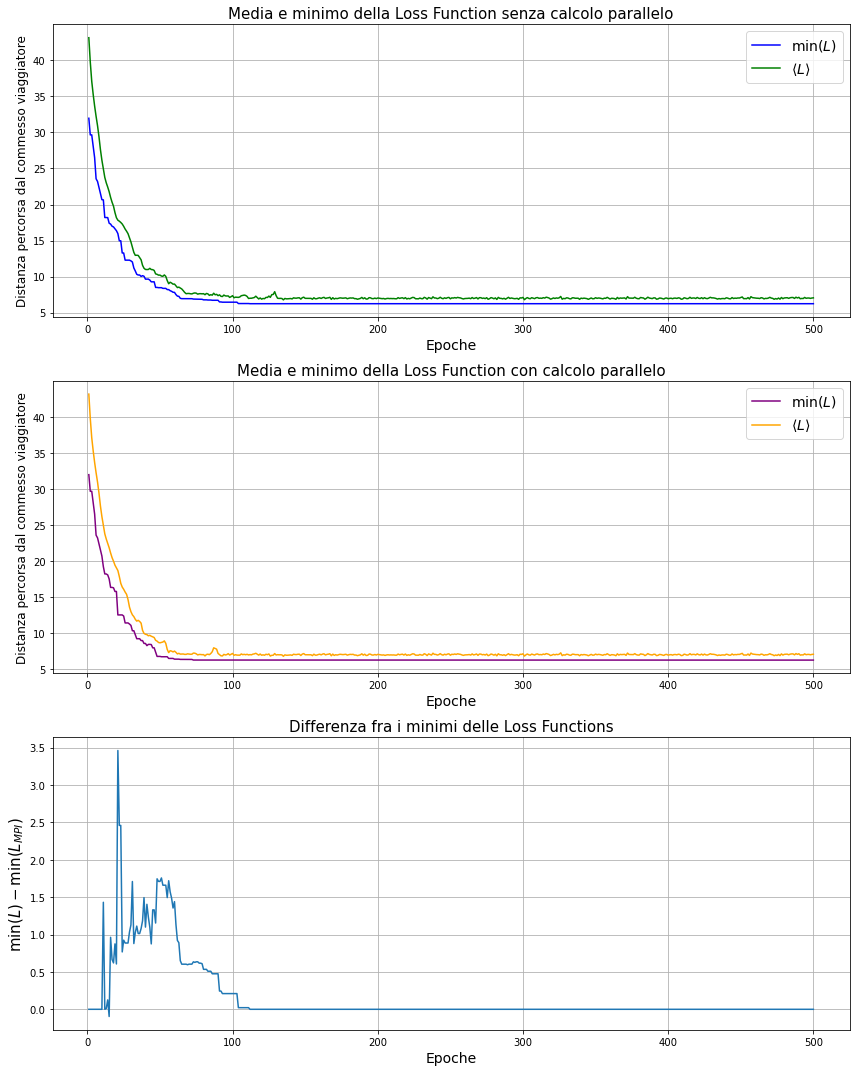

In [2]:
data_min_MPI = np.loadtxt('Circle_MPI/min_loss_function_c.dat')
data_mean_MPI = np.loadtxt('Circle_MPI/mean_loss_function_c.dat')
data_min = np.loadtxt('Circle_noMPI/min_loss_function_c.dat')
data_mean = np.loadtxt('Circle_noMPI/mean_loss_function_c.dat')

epochs = data_min[:, 0]
min_lf = data_min[:, 1]
mean_lf = data_mean[:, 1]

epochs_MPI = data_min_MPI[:, 0]
min_lf_MPI = data_min_MPI[:, 1]
mean_lf_MPI = data_mean_MPI[:, 1]


plt.figure(figsize=(12,15))

plt.subplot(3,1,1)
plt.title("Media e minimo della Loss Function senza calcolo parallelo",fontsize=15)
plt.plot(epochs, min_lf, color='blue', label='$\min(L)$')
plt.plot(epochs, mean_lf, color='green', label=r'$ \langle {L} \rangle  $')
plt.ylabel('Distanza percorsa dal commesso viaggiatore',fontsize=12)
plt.xlabel("Epoche",fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

plt.subplot(3,1,2)
plt.title("Media e minimo della Loss Function con calcolo parallelo",fontsize=15)
plt.plot(epochs_MPI, min_lf_MPI, color='purple', label='$\min(L)$')
plt.plot(epochs_MPI, mean_lf_MPI, color='orange', label=r'$ \langle {L} \rangle  $')
plt.ylabel('Distanza percorsa dal commesso viaggiatore',fontsize=12)
plt.xlabel("Epoche",fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

plt.subplot(3,1,3)
plt.title("Differenza fra i minimi delle Loss Functions",fontsize=15)
plt.plot(epochs_MPI, min_lf - min_lf_MPI)
plt.ylabel('$\min(L)-\min(L_{MPI})$',fontsize=15)
plt.xlabel("Epoche",fontsize=14)
plt.grid(True)

plt.tight_layout()

plt.show()

Si notano poche differenze fra i due casi, essendo che le Loss Function scendono molto rapidamente in entrambi i casi. Tuttavia il terzo grafico mostra come la computazione parallela riesce a convergere alla soluzione molto più velocemente, poichè avvicinandosi allo zero (ovvero alla situazione in cui i due casi raggiungono la stessa soluzione ottimale) la funzione $\min(L) - \min(L_{MPI})$ è positiva.

---

### Travelling salesman su un piano

Si effettua ora lo stesso procedimento effettuato nel caso del problema del travelling salesman su una circonferenza unitaria. Ovvero prima di tutto viene presentato il risultato nel caso in cui si stia utilizzando la computazione parallela.

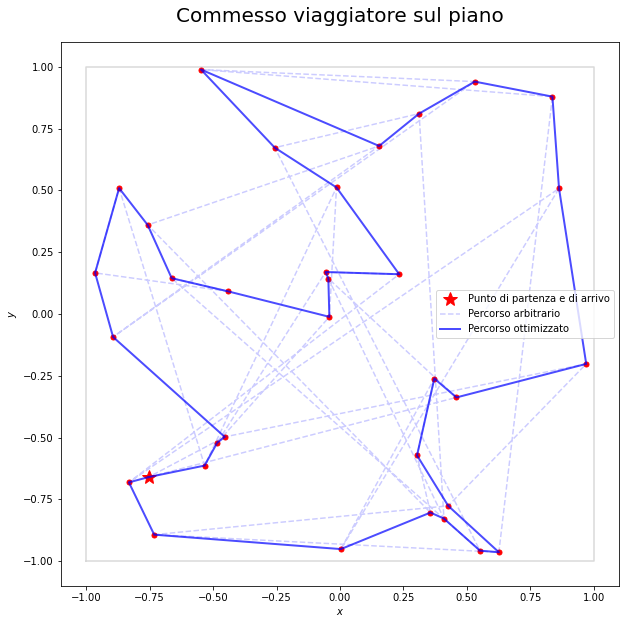

In [3]:
position0 = np.loadtxt('Plane_MPI/result_plane.dat')
position00 = np.loadtxt('Plane_MPI/points_plane.dat')

plt.figure(figsize=(10,10))
plt.title("Commesso viaggiatore sul piano", fontsize=20, pad=20)

# Plotto il quadrato di lato 2
x_q = [-1, 1, 1, -1, -1]
y_q = [-1, -1, 1, 1, -1]
plt.plot(x_q, y_q, color='grey', alpha=0.3)

# Estraggo i vettori delle x e delle y del percorso arbitrario iniziale
x0 = position00[:, 0]
y0 = position00[:, 1]
x0 = np.append(x0,x0[0])
y0 = np.append(y0,y0[0])

# Plotto i punti estratti sul piano come punti rossi
for i in range(len(position00)):
    plt.plot(x0[i], y0[i], color='red',marker='.',markersize=10)
    
# Marco il punto iniziale a forma di stella
plt.plot(x0[0],y0[0],'*', markersize=14, label='Punto di partenza e di arrivo',color='red') 

# Collego i punti del percorso arbitrario con una linea tratteggiata
plt.plot(x0,y0, label= "Percorso arbitrario",color='blue', linestyle='--',alpha =0.2)

#Percorso finale 
x = position0[:, 0]
y = position0[:, 1]
x = np.append(x,x[0])
y = np.append(y,y[0])

# Collego i punti del percorso ottimizzato con una linea continua
plt.plot(x,y, label= "Percorso ottimizzato",color='blue', linewidth=2,alpha=0.7)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

Anche in questo caso, come ci si poteva aspettare, la soluzione a cui si arriva utilizzando la computazione parallela è la stessa di quella del caso in cui non la si utilizza. Come in precedenza, vengono confrontati ora i grafici della convergenza alla soluzione nel caso in cui si utilizza oppure no la computazione parallela, con annesso grafico della differenza fra Loss Functions minime per ogni epoca.

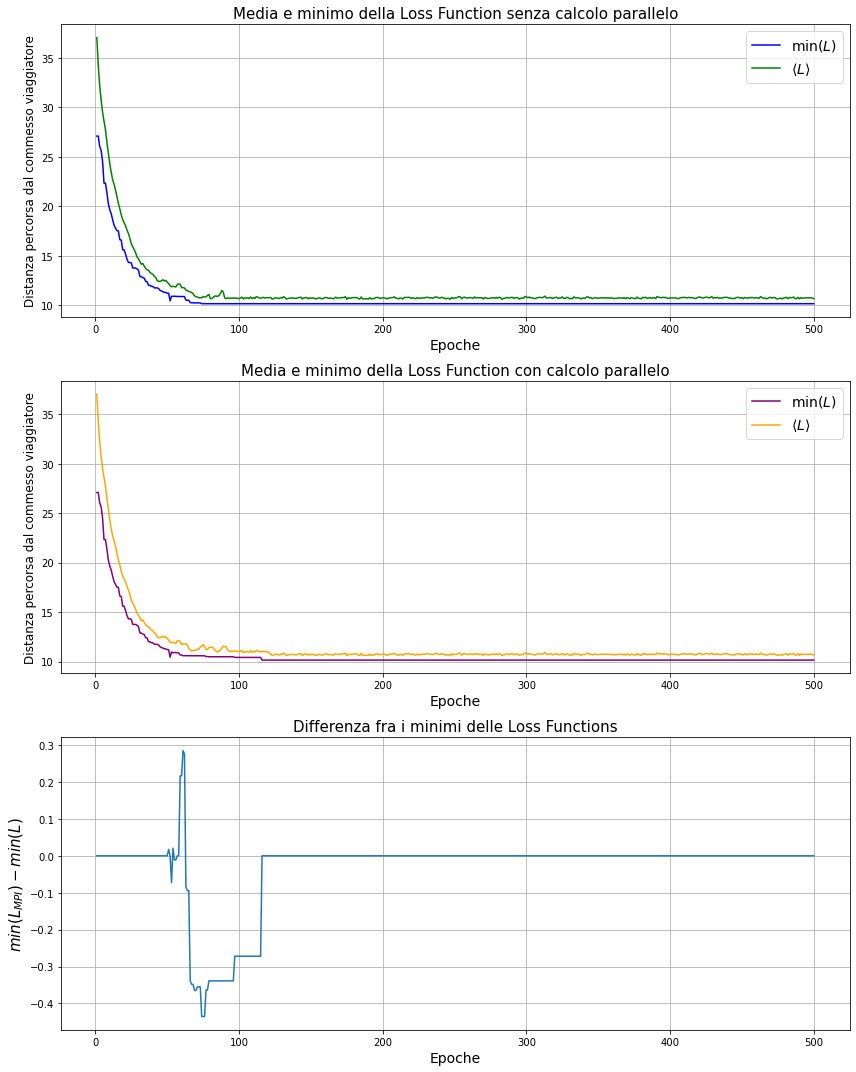

In [4]:
data_min_MPI = np.loadtxt('Plane_MPI/min_loss_function_p.dat')
data_mean_MPI = np.loadtxt('Plane_MPI/mean_loss_function_p.dat')
data_min = np.loadtxt('Plane_noMPI/min_loss_function_p.dat')
data_mean = np.loadtxt('Plane_noMPI/mean_loss_function_p.dat')

epochs = data_min[:, 0]
min_lf = data_min[:, 1]
mean_lf = data_mean[:, 1]

epochs_MPI = data_min_MPI[:, 0]
min_lf_MPI = data_min_MPI[:, 1]
mean_lf_MPI = data_mean_MPI[:, 1]


plt.figure(figsize=(12,15))

plt.subplot(3,1,1)
plt.title("Media e minimo della Loss Function senza calcolo parallelo",fontsize=15)
plt.plot(epochs, min_lf, color='blue', label='$\min(L)$')
plt.plot(epochs, mean_lf, color='green', label=r'$ \langle {L} \rangle  $')
plt.ylabel('Distanza percorsa dal commesso viaggiatore',fontsize=12)
plt.xlabel("Epoche",fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

plt.subplot(3,1,2)
plt.title("Media e minimo della Loss Function con calcolo parallelo",fontsize=15)
plt.plot(epochs_MPI, min_lf_MPI, color='purple', label='$\min(L)$')
plt.plot(epochs_MPI, mean_lf_MPI, color='orange', label=r'$ \langle {L} \rangle  $')
plt.ylabel('Distanza percorsa dal commesso viaggiatore',fontsize=12)
plt.xlabel("Epoche",fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

plt.subplot(3,1,3)
plt.title("Differenza fra i minimi delle Loss Functions",fontsize=15)
plt.plot(epochs_MPI, min_lf - min_lf_MPI)
plt.ylabel('$min(L_{MPI})-min(L)$',fontsize=15)
plt.xlabel("Epoche",fontsize=14)
plt.grid(True)

plt.tight_layout()

plt.show()

In questo caso si osserva come la computazione parallela non aiuta ad arrivare prima al risultato, infatti nel tendere allo zero, la funzione della differenza fra i minimi delle Loss Functions assume un valore negativo.

---

### Exercise 10.2

Apply your parallel code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

---

Viene utilizzata la stessa struttura di algoritmo genetico utilizzata fin'ora per risolvere il Travelling Salesman Problem per le capitali americane. Ovvero al posto di estrarre casualmente punti su una circonferenza unitaria o all'interno di un quadrato di raggio 1, i punti sono presenti già nel file 'American_capitals.dat', e corrispondono alle coordinate delle capitali americane.

Per eseguire questo algoritmo genetico con computazion e parallela, in realtà è stato utilizzato un file `American_capitals_2.dat`, in cui le coordinate delle città sono formattate in modo diverso rispetto al file originale. Questo perchè ci sono state delle problematiche nella lettura del file `American_capitals_.dat`.

Prima di tutto viene mostrato il risultato nel caso in cui non si stia utilizzando il calcolo parallelo, con la convergenza alla soluzione del minimo e della media della Loss Function.

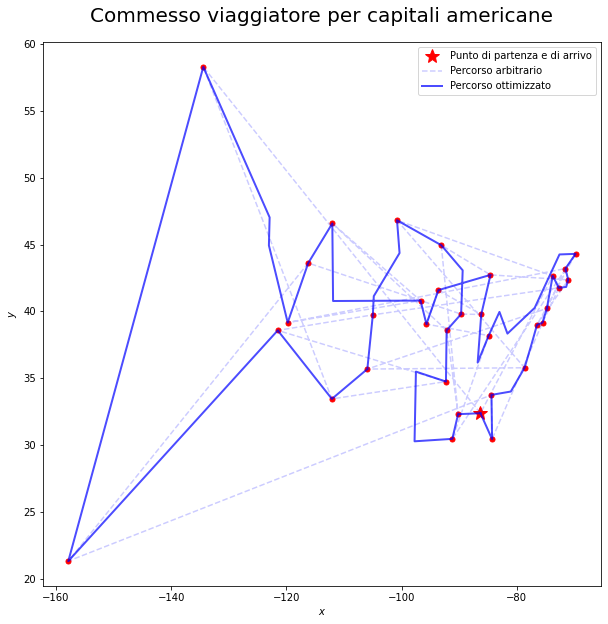

In [5]:
position0 = np.loadtxt('Capitals_noMPI/result_capitals.dat')
position00 = np.loadtxt('Capitals_noMPI/points_capitals.dat')

plt.figure(figsize=(10,10))
plt.title("Commesso viaggiatore per capitali americane", fontsize=20, pad=20)

# Estraggo i vettori delle x e delle y del percorso arbitrario iniziale
x0 = position00[:, 0]
y0 = position00[:, 1]
x0 = np.append(x0,x0[0])
y0 = np.append(y0,y0[0])

# Plotto i punti estratti sul piano come punti rossi
for i in range(len(position00)):
    plt.plot(x0[i], y0[i], color='red',marker='.',markersize=10)
    
# Marco il punto iniziale a forma di stella
plt.plot(x0[0],y0[0],'*', markersize=14, label='Punto di partenza e di arrivo',color='red') 

# Collego i punti del percorso arbitrario con una linea tratteggiata
plt.plot(x0,y0, label= "Percorso arbitrario",color='blue', linestyle='--',alpha =0.2)

#Percorso finale 
x = position0[:, 0]
y = position0[:, 1]
x = np.append(x,x[0])
y = np.append(y,y[0])

# Collego i punti del percorso ottimizzato con una linea continua
plt.plot(x,y, label= "Percorso ottimizzato",color='blue', linewidth=2,alpha=0.7)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

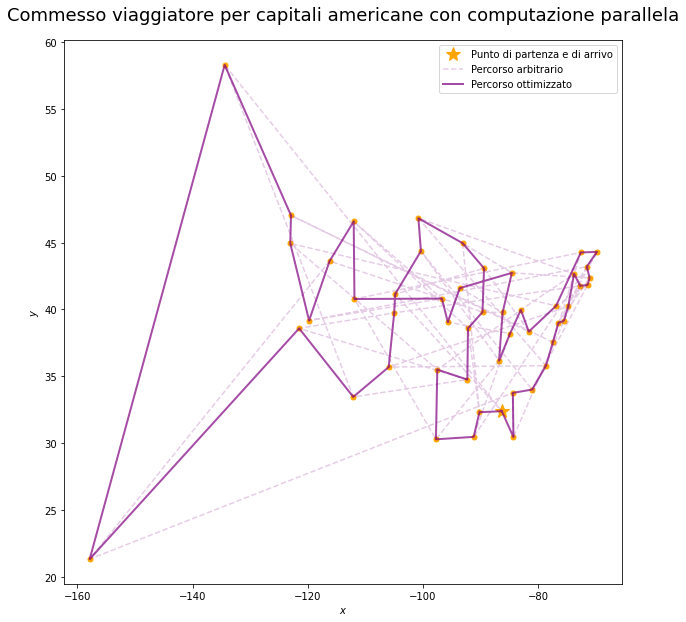

In [6]:
position0 = np.loadtxt('Capitals_MPI/result_capitals.dat')
position00 = np.loadtxt('Capitals_MPI/points_capitals.dat')

plt.figure(figsize=(10,10))
plt.title("Commesso viaggiatore per capitali americane con computazione parallela", fontsize=18, pad=20)

# Estraggo i vettori delle x e delle y del percorso arbitrario iniziale
x0 = position00[:, 0]
y0 = position00[:, 1]
x0 = np.append(x0,x0[0])
y0 = np.append(y0,y0[0])

# Plotto i punti estratti sul piano come punti rossi
for i in range(len(position00)):
    plt.plot(x0[i], y0[i], color='orange',marker='.',markersize=10)
    
# Marco il punto iniziale a forma di stella
plt.plot(x0[0],y0[0],'*', markersize=14, label='Punto di partenza e di arrivo',color='orange') 

# Collego i punti del percorso arbitrario con una linea tratteggiata
plt.plot(x0,y0, label= "Percorso arbitrario",color='purple', linestyle='--',alpha =0.2)

#Percorso finale 
x = position0[:, 0]
y = position0[:, 1]
x = np.append(x,x[0])
y = np.append(y,y[0])

# Collego i punti del percorso ottimizzato con una linea continua
plt.plot(x,y, label= "Percorso ottimizzato",color='purple', linewidth=2,alpha=0.7)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

Come ci si poteva aspettare, le due soluzioni coincidono. Verranno dunque paragonate le convergenze alla soluzione della media e del minimo della Loss Function in entrambi i casi, analizzando anche la differenza fra i minimi per ogni epoca.

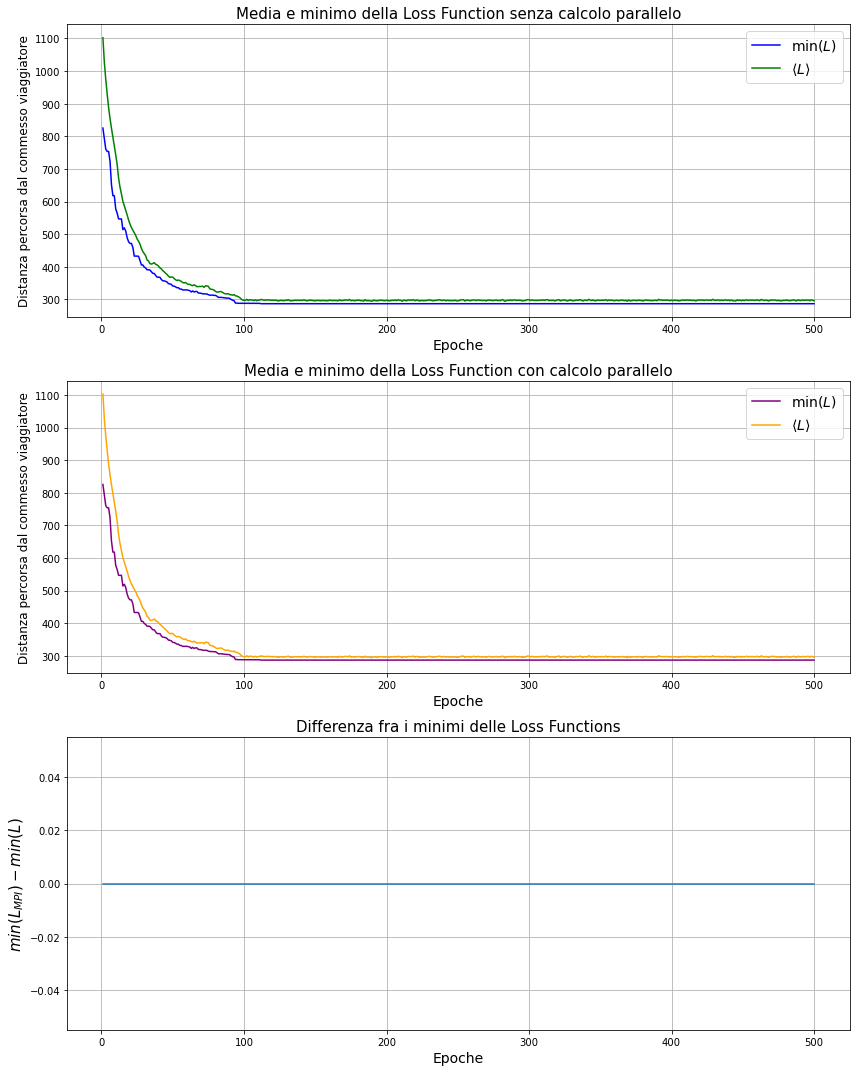

In [7]:
data_min_MPI = np.loadtxt('Capitals_MPI/min_loss_function.dat')
data_mean_MPI = np.loadtxt('Capitals_MPI/mean_loss_function.dat')
data_min = np.loadtxt('Capitals_noMPI/min_loss_function.dat')
data_mean = np.loadtxt('Capitals_noMPI/mean_loss_function.dat')

epochs = data_min[:, 0]
min_lf = data_min[:, 1]
mean_lf = data_mean[:, 1]

epochs_MPI = data_min_MPI[:, 0]
min_lf_MPI = data_min_MPI[:, 1]
mean_lf_MPI = data_mean_MPI[:, 1]


plt.figure(figsize=(12,15))

plt.subplot(3,1,1)
plt.title("Media e minimo della Loss Function senza calcolo parallelo",fontsize=15)
plt.plot(epochs, min_lf, color='blue', label='$\min(L)$')
plt.plot(epochs, mean_lf, color='green', label=r'$ \langle {L} \rangle  $')
plt.ylabel('Distanza percorsa dal commesso viaggiatore',fontsize=12)
plt.xlabel("Epoche",fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

plt.subplot(3,1,2)
plt.title("Media e minimo della Loss Function con calcolo parallelo",fontsize=15)
plt.plot(epochs_MPI, min_lf_MPI, color='purple', label='$\min(L)$')
plt.plot(epochs_MPI, mean_lf_MPI, color='orange', label=r'$ \langle {L} \rangle  $')
plt.ylabel('Distanza percorsa dal commesso viaggiatore',fontsize=12)
plt.xlabel("Epoche",fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

plt.subplot(3,1,3)
plt.title("Differenza fra i minimi delle Loss Functions",fontsize=15)
plt.plot(epochs_MPI, min_lf - min_lf_MPI)
plt.ylabel('$min(L_{MPI})-min(L)$',fontsize=15)
plt.xlabel("Epoche",fontsize=14)
plt.grid(True)

plt.tight_layout()

plt.show()

Si osserva come nei due casi in cui si utilizza oppure no la computazione parallela per risolvere il Travelling Salesman Problem per le capitali americane (per lo meno utilizzando due processi), la convergenza alla soluzione è esattamente la stessa, infatti si nota come il grafico della differenza fra le Loss Functions è nullo per tutte le epoche.